In [11]:
from __future__ import division # use presice division
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import pandas as pd 

In [12]:
def bpr_fun(volumn, freeTime, capacity, alpha=0.15, beta=4):
    # travelTime = BPR_fun(volumn, freeTime, capacity, alpha=0.15, beta=4)
    # edge travel time function
    # input: volumn, freeTime, capacity, alpha=0.15, beta=4
    # output: travelTime, ndarray class
    travelTime = freeTime + freeTime * alpha * (volumn / capacity) ** beta
    return travelTime 


def all_nothing(df, source, target, demand):
    ''' allot demand to shortest path
    df -- dataframe object of graph edge list with multi attributes
    demand -- numeric type of od demand
    return volumn, travelTime '''
    MDG = nx.from_pandas_edgelist(df, source="source", target="target", edge_attr=True, create_using=nx.MultiDiGraph) 
    shortestPath = nx.shortest_path(MDG, source=1, target=9, weight='travelTime')
    shortestPath = {(s, t) for s, t in zip(shortestPath[:-1], shortestPath[1:])}
    idx = range(df.shape[0])
    for i, s, t in zip(idx, df["source"], df["target"]):
        if (s, t) in shortestPath:
            df.loc[i, "volumn"] = demand
    
    volumn = df["volumn"]
    travelTime = bpr_fun(volumn=df["volumn"], freeTime=df["freeTime"], capacity=df["capacity"])
    df["travelTime"] = travelTime
    return volumn, travelTime, df 


def obj_fun(gamma, volumn, volumnPre, capacity, freeTime):
    '''objective function of line serach optimization'''
    volumnTmp = volumn + gamma * (volumnPre - volumn)
    objVecVal = 1.0*freeTime*volumnTmp + 0.03*freeTime*volumnTmp**5/capacity**4
    objVal = np.sum(objVecVal)
    return objVal


def step_search(volumn, volumnPre, freeTime, capacity):
    '''get gamma, the step length '''
    f = lambda gamma: obj_fun(gamma, volumn, volumnPre, capacity, freeTime)
    res = minimize_scalar(f, bounds=(0.,1.), method='bounded')
    gamma = res.x
    return gamma

In [13]:
#def main():
    # creat od
    OD = (1, 9, 2000.)
    demand = OD[-1]
    # load graph edge list with attributes
    df = pd.read_csv("D:\\jobsplay\\MyPython\\SingleODUEAssignment\\N9E12DataFrame.csv", index_col=0) 
    capacity = df["capacity"]
    freeTime = df["freeTime"]
    # step 1 initialize feasible edge flow
    volumn, travelTime, df = all_nothing(df, 1, 9, demand)
    # step 2 loop to find equilibrium edge flow
    for count in range(1):
        dfPre = df.copy()
        volumnPre = dfPre["volumn"]
        volumn, travelTime, df = all_nothing(df, 1, 9, demand)
        # step 2.1 find step length


#if __name__ == '__main__':
    #main()

In [37]:
freeTime

0     1500
1     1500
2     1500
3     1500
4     1500
5     1500
6     1500
7     1500
8     1500
9     1500
10    1500
11    1500
Name: freeTime, dtype: int64

In [33]:
def step_search_obj(alpha, edgeFlow, loadedEdgeFlow, freeTT, capacity):
    # step search objctive function
    newEdgeFlow = edgeFlow + alpha * (loadedEdgeFlow-edgeFlow)
    obj = freeTT * newEdgeFlow + (3*freeTT*newEdgeFlow**5) / (100*capacity**4)
    #obj =  1.0*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow) + 0.3*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow)**2/capacity + 0.045*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow)**3/capacity**2 + 0.003375*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow)**4/capacity**3 + 0.00010125*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow)**5/capacity**4
    obj = np.sum(obj)
    return obj

In [34]:
y = np.arange(0, 1, 0.1)
for i, gamma in enumerate(np.arange(0, 1, 0.1)):
    fVal = step_search_obj(gamma, edgeFlow=volumn, loadedEdgeFlow=volumnPre, freeTT=freeTime, capacity=capacity)
    y[i] = fVal

gamma = np.arange(0, 1, 0.1)

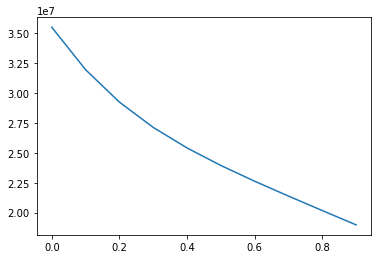

In [35]:
plt.plot(gamma, y)

In [ ]:
shortestPath

In [ ]:
shortestPathLength

In [ ]:
tuple(nx.utils.pairwise(shortestPath) )   

In [ ]:
# update edge volumn with demand

In [ ]:
for s, t in zip(shortestPath[:-1], shortestPath[1:]):
    N9E12[s][t]["volumn"] = 2000.
    
for e, volumn in zip(N9E12.edges, N9E12.edges.data("volumn")):
    print(e, volumn)
    

In [ ]:
# update edge travel time

In [ ]:
# visualizw graph

In [ ]:
pos = nx.random_layout(N9E12)

In [ ]:
plot = nx.draw_networkx(G=N9E12, pos=pos)

In [ ]:
edge_labels = nx.draw_networkx_edge_labels(N9E12, pos=pos)

In [ ]:
# load network
def load_network(filename):
    """network = load_network(): load network from filename.csv
    |--input: filename
    |--output: network, type is ndarray class
    """
    network = np.loadtxt(filename, dtype=np.int32, delimiter=',')
    return network


In [ ]:
network = load_network('N9E12.csv')
network

In [ ]:


def load_edgepathmat(filename):
    """load_edgepathmat(): load edgePathMat from filename.csv
    |--input: filename
    |--output: edgePathMat is ndarray class
    """
    edgePathMat = np.loadtxt(filename, dtype=np.int32, delimiter=',')
    return edgePathMat

def gen_all_paths(network, ONode, DNode):
    """gen_all_paths(): to generate all acyclic paths
       |--input: G, O, D
       |--output: pathTrack"""
    G = nx.DiGraph()
    G.add_edges_from(network)
    allPaths = nx.all_simple_paths(G, source=ONode, target=DNode)
    pathTrack = []
    for i, path in enumerate(allPaths):
        pathTrack.append(path)
    
    return pathTrack



def edgeTT_to_pathTT(edgeTT, edgePathMat):
    # pathTT = edgeTT_to_pathTT(edgeTT, edgePathMat) convert edge travel time to path travel time
    # input: edgeTT, edgePathMat
    # output: pathTT ndarray class
    pathTT = edgeTT.dot(edgePathMat)
    return pathTT

def all_nothing_load(demand, pathTT, edgePathMat):
    # loadedEdgeFlow = all_nothing_load(demand, pathTT, edgePathMat) to assign demand to shortest path
    # input: demand, pathTT, edgePathMat
    # output: loadedEdgeFlow ndarray class
    idx = np.argmin(pathTT)
    loadedEdgeFlow = demand * edgePathMat[:, idx]
    return loadedEdgeFlow

def init_edgeflow(demand, freeTT, capacity, edgePathMat):
    # edgeFlow = init_edgeflow(demand, freeTT, capacity, edgePathMat) to give init feasible edge flow
    # input: demand, freeTT, capacity, edgePathMat
    # output: edgeFlow ndarray
    edgeFlow = np.zeros(freeTT.shape[0])
    edgeTT = BPR_fun(edgeFlow, freeTT, capacity, alpha=0.15, beta=4)
    pathTT = edgeTT_to_pathTT(edgeTT, edgePathMat)
    loadedEdgeFlow = all_nothing_load(demand, pathTT, edgePathMat)
    edgeFlow = loadedEdgeFlow.copy()
    return edgeFlow

def step_search_obj(alpha, edgeFlow, loadedEdgeFlow, freeTT, capacity):
    # step search objctive function
    newEdgeFlow = edgeFlow + alpha * (loadedEdgeFlow-edgeFlow)
    obj = freeTT * newEdgeFlow + (3*freeTT*newEdgeFlow**5) / (100*capacity**4)
    #obj =  1.0*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow) + 0.3*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow)**2/capacity + 0.045*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow)**3/capacity**2 + 0.003375*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow)**4/capacity**3 + 0.00010125*freeTT*(alpha*(-edgeFlow + loadedEdgeFlow) + edgeFlow)**5/capacity**4
    obj = np.sum(obj)
    return obj

def step_search(edgeFlow, loadedEdgeFlow, freeTT, capacity):
    # alpha = step_search(edgeFlow, loadedEdgeFlow, freeTT, capacity) to get alpha from univariate optimization
    f = lambda alpha: step_search_obj(alpha, edgeFlow, loadedEdgeFlow, freeTT, capacity)
    res = minimize_scalar(f, bounds=(0,1), method='bounded')
    alpha = res.x
    return alpha

def update_edgeflow(edgeFlow, loadedEdgeFlow, alpha):
    # newEdgeFlow = update_edgeflow(edgeFlow, loadedEdgeFlow, alpha)
    # to update edge flow
    newEdgeFlow = edgeFlow + alpha*(loadedEdgeFlow-edgeFlow)
    return newEdgeFlow

def is_converged(newEdgeFlow, edgeFlow, err=0.001):
    testValue = np.sqrt(np.sum((newEdgeFlow-edgeFlow)**2)) / np.sum(edgeFlow)
    if testValue <= err:
        flag = True
    else:
        flag = False
    
    return flag

def main_loop(edgeFlow,freeTT, capacity, edgePathMat, demand, maxCount=100, err=0.0001):
    # edgeFlow, count = main_loop(edgeFlow,freeTT, capacity, edgePathMat, demand, maxCount=100)
    # to find equilibrium edge flow pattern
    for i in np.arange(maxCount):
        newEdgeTT = BPR_fun(edgeFlow, freeTT, capacity, alpha=0.15, beta=4)
        newPathTT = edgeTT_to_pathTT(newEdgeTT, edgePathMat)
        loadedEdgeFlow = all_nothing_load(demand, newPathTT, edgePathMat)
        alpha = step_search(edgeFlow, loadedEdgeFlow, freeTT, capacity)
        newEdgeFlow = update_edgeflow(edgeFlow, loadedEdgeFlow, alpha)
        if is_converged(newEdgeFlow, edgeFlow, err):
            break
        else:
            edgeFlow = newEdgeFlow.copy()
        #
    #
    count = i
    return edgeFlow, count


In [ ]:
networkIfo = load_network('N9E12.csv')
network = networkIfo[:, 0:2]
capacity = networkIfo[:, 2]
freeTT = networkIfo[:, 3]
trip = load_trip('N9E12Trip.csv')
ONode, DNode = trip[0], trip[1]
edgePathMat = load_edgepathmat('N9E12EdgePathMat.csv')
demand = 2000



In [ ]:
edgeFlow = init_edgeflow(demand, freeTT, capacity, edgePathMat)
edgeFlow, count = main_loop(edgeFlow,freeTT, capacity, edgePathMat, demand, maxCount=600, err=0.00001)
print(edgeFlow, count)

In [ ]:
network
networkIfo
edgePathMat

In [ ]:
network

In [ ]:
a1 = np.mat([1, 2])

In [ ]:
a1

In [ ]:
a2 = np.mat([[1], [2]])

In [ ]:
a2

In [ ]:
a1.shape

In [ ]:
a2.shape

In [ ]:
a2*2

In [ ]:
a3 = a1.T

In [ ]:
a3

In [ ]:
a4 = np.multiply(a2, a3) # dot multiply
a4

In [ ]:
a5 = np.divide(a2, a3)# dot divide
a5

In [ ]:
a3[1, 0] = 3